# -[Given a csv file containing per capita income of canada over the years. The task is to make a basic ML model that predicts the per capita income in 2020.
# Created a test csv that contains a column of years 2019-2025. This is taken as the input for the ML model. Result is a csv file containing the per capita income predicted by the model for the years 2019-2025. Also computed and stored R square value of the model in a text file.]-

Topics covered in this problem: -
*   Linear Regression & coefficient of determination
*   Least Square Method to find best fit regression line
*   Data visualization in python 
*   File handling in python
*   Use of Pandas, sklearn, matplotlib libraries 



In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

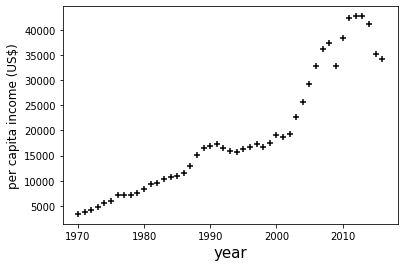

In [105]:
# reading the csv file and creating a scatter plot to visualize the data 
df = pd.read_csv("per_capita.csv")

plt.xlabel("year", fontsize="15")
plt.ylabel("per capita income (US$)", fontsize="12")
plt.scatter(df.year, df[["per capita income (US$)"]], color="black", marker="+")

In [82]:
# creating a linear regression object and fitting it as per the given data
reg = linear_model.LinearRegression()
reg.fit(df[["year"]], df["per capita income (US$)"])    

# reading the test file
test_file = pd.read_csv("test.csv")

# predicting the result using the ML model and then storing the result
test_results = reg.predict(test_file)

In [83]:
# creating a new results csv file and exporting the test results.
test_file["[per capita income (US$)"] = test_results
test_file.to_csv("result2.csv", index="False")

The coefficient of determination, aka the R-squared value is a statistical measure of how close the data is to the fitted regression line. Ranges from 0-1.

In [99]:
# Calculating and storing R square value of the model in a text file
r_square = reg.score(df[["year"]], df["per capita income (US$)"])
rsqr = open("r_square_value.txt", "w")
rsqr.write("R^2: ")
rsqr.write(str(r_square))
rsqr.close()

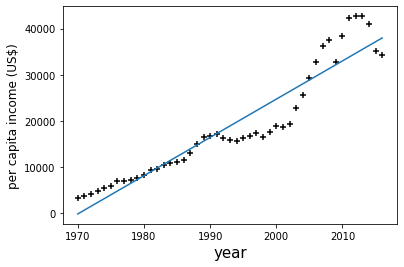

In [123]:
# plotting the best fit regression line on a scatter plot and exporting the graph as a pdf

# computing slope and y-intercept for the best fit regression line
m, c = np.polyfit(df.year, df[["per capita income (US$)"]], 1)  # polyfit(x, y, degree) returns slope and y-intercept of best fit for data x and y.

plt.ylabel("per capita income (US$)", fontsize="12")
plt.xlabel("year", fontsize="15")
plt.scatter(df.year, df["per capita income (US$)"], color="black", marker='+')
plt.plot(df.year, m * df.year + c)    # plt.plot(x, m * x + c)  where x is array of values on x axis, m is slope, c is y intercept

plt.savefig("linear_regression-scatter_plot.pdf")